In [1]:
!pip install opencv-python --quiet

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
# Path gambar di Google Drive
img_path = "/content/drive/MyDrive/Colab Notebooks/dataset/pwt.jpeg"

# Muat gambar
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan di: {img_path}")

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Unduh dan muat Haar Cascade face detector
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
cascade_path = "haarcascade_frontalface_default.xml"

# Download file cascade
!wget -q {haarcascade_url} -O {cascade_path}

face_cascade = cv2.CascadeClassifier(cascade_path)

# Deteksi wajah
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print(f"Jumlah wajah terdeteksi: {len(faces)}")


Jumlah wajah terdeteksi: 6


In [20]:
# 1) Urutkan dulu dari kiri ke kanan
faces_sorted = sorted(faces, key=lambda x: x[0])

# 2) Ambil hanya 4 bounding box TERATAS (misalnya yang posisinya paling atas di gambar)
#    karena kepala pasti lebih tinggi daripada kotak di badan
faces_sorted = sorted(faces_sorted, key=lambda x: x[1])[:4]

# 3) Setelah itu urutkan lagi dari kiri ke kanan untuk pemberian nama
faces_sorted = sorted(faces_sorted, key=lambda x: x[0])


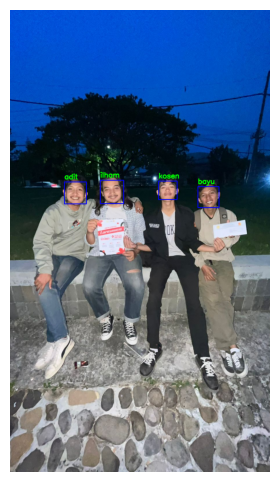

In [21]:
names = ["adit", "ilham", "kosen", "bayu"]  # kiri -> kanan, kanan = bayu

img_annotated = img.copy()

for (x, y, w, h), name in zip(faces_sorted, names):
    # gambar kotak
    cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # tulis nama di atas kotak
    text_y = y - 10 if y - 10 > 10 else y + h + 30
    cv2.putText(
        img_annotated,
        name,
        (x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2,
        cv2.LINE_AA
    )

img_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [22]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path gambar di Google Drive
img_path = "/content/drive/MyDrive/Colab Notebooks/dataset/Jakarta.jpg"

# Baca gambar
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {img_path}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Download dan load Haar Cascade
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
cascade_path = "haarcascade_frontalface_default.xml"

!wget -q {haarcascade_url} -O {cascade_path}
face_cascade = cv2.CascadeClassifier(cascade_path)


In [24]:
# Deteksi wajah
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(60, 60)
)

print("Jumlah deteksi awal:", len(faces))
if len(faces) == 0:
    raise ValueError("Tidak ada wajah terdeteksi.")

# Kalau deteksi lebih dari 5, ambil 5 wajah paling atas (hindari kotak di badan)
faces_top5 = sorted(faces, key=lambda r: r[1])[:5]

# Urutkan lagi dari kiri ke kanan
faces_sorted = sorted(faces_top5, key=lambda r: r[0])
print("Jumlah wajah dipakai:", len(faces_sorted))


Jumlah deteksi awal: 8
Jumlah wajah dipakai: 5


In [26]:
# Deteksi seperti sebelumnya
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=6,
    minSize=(60, 60)
)

print("Jumlah deteksi awal:", len(faces))

# ---------------------------------------------------
# FILTER: buang kotak yang terlalu tinggi (di papan/tulisan)
# asumsi: wajah orang berada di 40–80% tinggi gambar
# ---------------------------------------------------
h_img, w_img = gray.shape[:2]
y_min = int(0.3 * h_img)   # batas atas area wajah
y_max = int(0.85 * h_img)  # batas bawah area wajah

faces_person = []
for (x, y, w, h) in faces:
    cy = y + h // 2  # titik tengah vertikal
    if y_min <= cy <= y_max:
        faces_person.append((x, y, w, h))

print("Setelah filter area badan:", len(faces_person))

if len(faces_person) == 0:
    raise ValueError("Tidak ada wajah dalam area badan.")

# Jika masih lebih dari 5, ambil 5 yang paling lebar (kemungkinan wajah dekat kamera)
faces_person = sorted(faces_person, key=lambda r: r[2], reverse=True)[:5]

# Urutkan dari kiri ke kanan
faces_sorted = sorted(faces_person, key=lambda r: r[0])
print("Jumlah wajah dipakai:", len(faces_sorted))


Jumlah deteksi awal: 8
Setelah filter area badan: 5
Jumlah wajah dipakai: 5


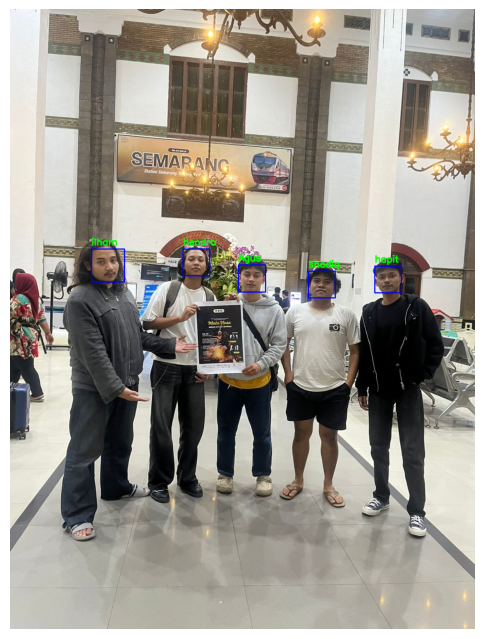

In [28]:
names = ["ilham", "hendro", "Agus", "shodiq", "hapit"]  # urut kiri -> kanan

img_annotated = img.copy()

for (x, y, w, h), name in zip(faces_sorted, names):
    cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (255, 0, 0), 2)

    text_y = y - 10 if y - 10 > 10 else y + h + 30
    cv2.putText(
        img_annotated,
        name,
        (x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2,
        cv2.LINE_AA
    )

img_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
